<a href="https://colab.research.google.com/github/areebah-nadeem/AREEBAH_NADEEM__SECTION407_Lab3/blob/main/Areebah_Nadeem_COMP377Lab4__ex1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Areebah_Nadeem_COMP377Lab4_ ex1 and 2**

Lab Assignment #4 – Use CNNs in image classification problems

Exercise 1: Convolutional Neural Networks
In this exercise you will implement a CNN model for digit classification using TensorFlow and
MNIST dataset. Here is the architecture of the network:
- Use a convolution and subsampling layer followed by a densely connected output
layer which will feed into the softmax regression and cross entropy objective.
- Use mean pooling for the subsampling layer.
- Use the back-propagation algorithm to calculate the gradient with respect to the
parameters of the model.
- Train the parameters of the network with stochastic gradient descent and momentum.
Test the model performance and compare the accuracy with that obtained by using SVM model.

In [4]:
# Install TensorFlow
!pip install tensorflow

# Install matplotlib for visualization
!pip install matplotlib

# Install numpy
!pip install numpy

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.7785 - loss: 0.7226 - val_accuracy: 0.9140 - val_loss: 0.2935
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9218 - loss: 0.2737 - val_accuracy: 0.9444 - val_loss: 0.1993
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9448 - loss: 0.1907 - val_accuracy: 0.9573 - val_loss: 0.1448
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9593 - loss: 0.1439 - val_accuracy: 0.9684 - val_loss: 0.1109
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9677 - loss: 0.1154 - val_accuracy: 0.9714 - val_loss: 0.0978
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9726 - loss: 0.0997 - val_accuracy: 0.9751 - val_loss: 0.0834
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9753 - loss: 0.0885 - val_accuracy: 0.9765 - val_loss: 0.0793
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9766 - loss: 0.0813 - 

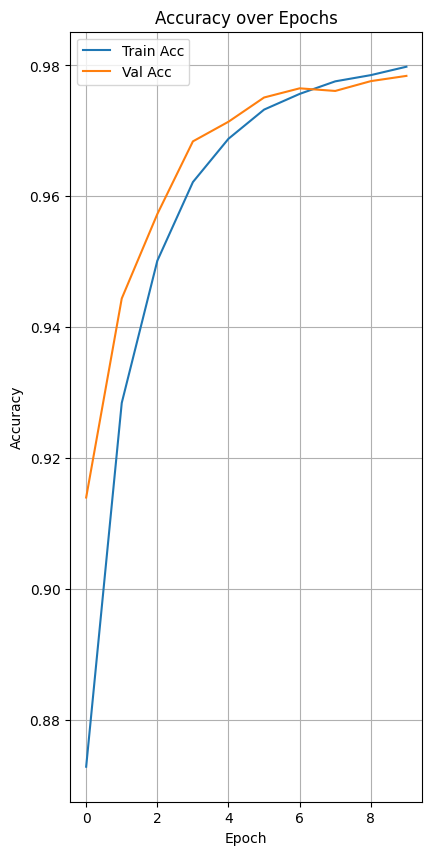

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Normalize the pixel values
train_x = train_x / 255.0
test_x = test_x / 255.0

# Reshape for CNN adding channel
train_x_cnn = train_x.reshape(-1, 28, 28, 1)
test_x_cnn = test_x.reshape(-1, 28, 28, 1)

#  labels for CNN
train_y_cnn = to_categorical(train_y, 10)
test_y_cnn = to_categorical(test_y, 10)

# Build CNN model
cnn_model = Sequential()


# setting filter and it's size
number_of_filters = 6
filter_size = (3, 3)

# Shape of image
image_height = 28
image_width = 28
channels = 1

# Add a convolutional layer to the model
cnn_model.add(Conv2D(
    filters=number_of_filters,
    kernel_size=filter_size,
    activation='relu',
    input_shape=(image_height, image_width, channels)
))


#Shrinks image size
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))
#Converts to 1D vector
cnn_model.add(Flatten())
#prediction
cnn_model.add(Dense(10, activation='softmax'))

# Compile model
cnn_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train model
history = cnn_model.fit(train_x_cnn, train_y_cnn,
                        epochs=10,
                        batch_size=64,
                        validation_data=(test_x_cnn, test_y_cnn),
                        verbose=1)

# Evaluate CNN
loss, acc = cnn_model.evaluate(test_x_cnn,
                               test_y_cnn,
                               verbose=0)

print("CNN Accuracy:", round(acc, 4))

# SVM part
train_x_flat = train_x.reshape(-1, 784)
test_x_flat = test_x.reshape(-1, 784)

# Use smaller training set for speed
svm = SVC(kernel='rbf')
svm.fit(train_x_flat[:10000], train_y[:10000])

svm_preds = svm.predict(test_x_flat)
svm_acc = accuracy_score(test_y, svm_preds)
print("SVM Accuracy:", round(svm_acc, 4))

# Plot accuracy and loss
plt.figure(figsize=(10, 10))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


Exercise 2: Convolutional Neural Networks
In this exercise you will build a CNN model for photo classification using TensorFlow. Use
CIFAR-10 dataset developed by the Canadian Institute for Advanced Research
(https://www.cs.toronto.edu/~kriz/cifar.html). Evaluate the accuracy of the model.

In [4]:
!pip install -U tensorflow

In [2]:
# Step 1: Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets
import numpy as np

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.3974 - loss: 1.6583 - val_accuracy: 0.5694 - val_loss: 1.2069
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6082 - loss: 1.1131 - val_accuracy: 0.6382 - val_loss: 1.0453
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.6677 - loss: 0.9562 - val_accuracy: 0.6632 - val_loss: 0.9674
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.7057 - loss: 0.8483 - val_accuracy: 0.6668 - val_loss: 0.9728
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.7357 - loss: 0.7597 - val_accuracy: 0.6850 - val_loss: 0.9129
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7636 - loss: 0.6825 - val_accuracy: 0.6766 - val_loss: 0.9721
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.7903 - loss: 0.6080 - val_accuracy: 0.6987 - val_loss: 0.9121
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.8156 - loss: 0.5386 - 

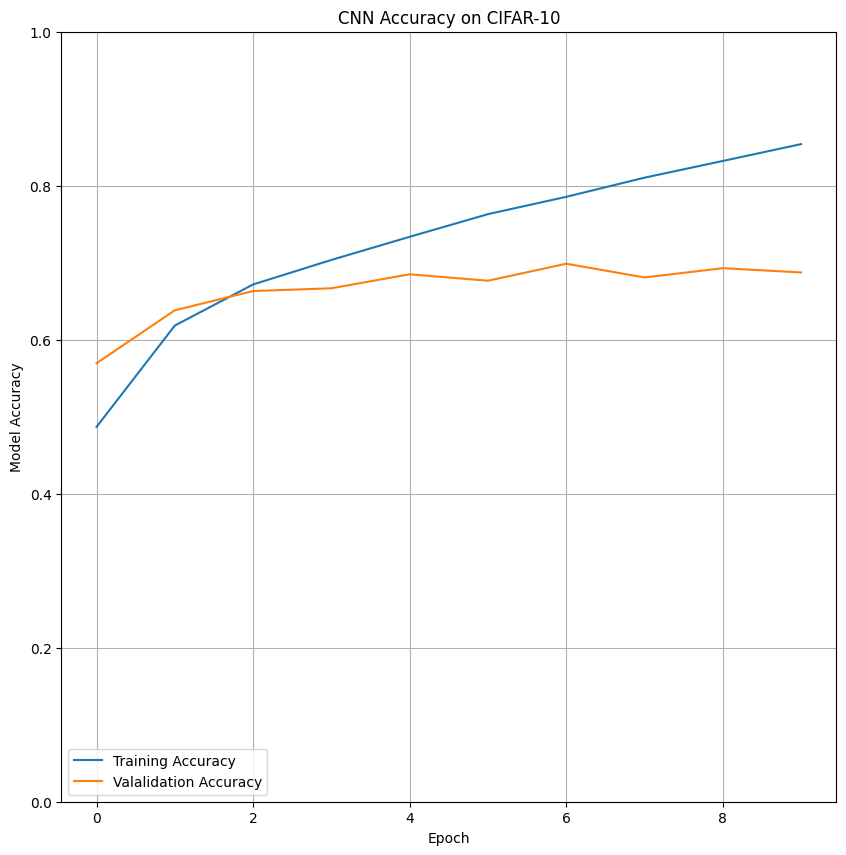

In [3]:


# Step 2: Loading and preprocessing the data
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

# Normalizing the pixel values to 0 and  1
train_x, test_x = train_x / 255.0, test_x / 255.0

# Step 3: Define the model
model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(train_x, train_y,
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_x, test_y))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Step 7: Plot training and validation accuracy
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'],
         label='Training Accuracy')
plt.plot(history.history['val_accuracy'],
         label='Valalidation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')
plt.grid(True)
plt.ylim([0, 1])
plt.legend(loc='lower left')
plt.title('CNN Accuracy on CIFAR-10')
plt.show()
